<a href="https://colab.research.google.com/github/ByronFC3/2/blob/main/Final_Project_LSTM_v4_asof_12Nov2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Now you can access the file using its path within your Drive
file_path = '/content/drive/My Drive/AAPL_yearly_data_with_dates.csv'  # Update with the correct path
#The file path was incorrect, it should be AAPL and not AALE.
AAPL = pd.read_csv('/content/drive/MyDrive/DAA_FinWork _CODE_from 24Nov24 - Copy/AAPL_jump.csv')
AAPL.fillna(0, inplace=True)
AAPL.head(15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Close,Open,High,Low,Volume,Timestamp,Log_Return,Date,RBV,MedRV,Time,DayOfWeek,ShortH,z,Weight,WSD_j,WSD,Jump_Statistic,Jump
0,133.961,134.080,134.12,133.790,972451,2020-12-31 09:30:00,0.000000,2020-12-31,3.317061e-07,0.006301,09:30:00,3,0.006709,0.000000,1,0.008893,0.975097,0.000000,0
1,134.100,133.968,134.24,133.920,401320,2020-12-31 09:31:00,0.001037,2020-12-31,3.317061e-07,0.006301,09:31:00,3,0.001946,0.532852,1,0.002308,0.995886,0.165278,0
2,134.310,134.100,134.46,134.020,542856,2020-12-31 09:32:00,0.001565,2020-12-31,3.317061e-07,0.006301,09:32:00,3,0.001252,1.249779,1,0.001415,0.977692,0.254017,0
3,134.631,134.310,134.74,134.290,506714,2020-12-31 09:33:00,0.002387,2020-12-31,3.317061e-07,0.006301,09:33:00,3,0.001502,1.589558,1,0.001669,0.992960,0.381559,0
4,134.150,134.617,134.66,134.130,498419,2020-12-31 09:34:00,-0.003579,2020-12-31,3.317061e-07,0.006301,09:34:00,3,0.001519,-2.356571,1,0.001603,0.990952,-0.573243,0
5,134.122,134.140,134.39,134.100,385257,2020-12-31 09:35:00,-0.000209,2020-12-31,3.317061e-07,0.006301,09:35:00,3,0.001319,-0.158287,1,0.001301,0.995565,-0.033278,0
6,134.020,134.122,134.22,134.000,376165,2020-12-31 09:36:00,-0.000761,2020-12-31,3.317061e-07,0.006301,09:36:00,3,0.001153,-0.659589,1,0.001137,0.992444,-0.121667,0
7,134.080,134.005,134.30,134.000,414531,2020-12-31 09:37:00,0.000448,2020-12-31,3.317061e-07,0.006301,09:37:00,3,0.001374,0.325861,1,0.001415,0.990518,0.071719,0
8,134.032,134.084,134.17,133.940,356369,2020-12-31 09:38:00,-0.000358,2020-12-31,3.317061e-07,0.006301,09:38:00,3,0.000912,-0.392708,1,0.001013,0.992949,-0.057233,0
9,134.280,134.050,134.38,134.000,372108,2020-12-31 09:39:00,0.001849,2020-12-31,3.317061e-07,0.006301,09:39:00,3,0.001343,1.376186,1,0.001312,0.991233,0.295993,0


In [ ]:
# Step 1, Import datasets
# Load the data
AAPL = pd.read_csv('AALE_yearly_data_with_dates.csv')
AAPL.fillna(0, inplace=True)
AAPL.head(15)

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Timestamp,Jump,Jump_60min,...,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
0,133.961,0.241,134.080,134.12,133.790,1536.0,972451,2020-12-31 09:30:00,0,0,...,0.000000,0.000000,0.000000,0.0000,0.000000,972451.0,0.0,0.000,0.000,0.0
1,134.100,0.139,133.968,134.24,133.920,1294.0,401320,2020-12-31 09:31:00,0,0,...,0.001038,0.000000,0.000000,0.0000,0.000000,401320.0,0.0,133.961,0.000,972451.0
2,134.310,0.210,134.100,134.46,134.020,1809.0,542856,2020-12-31 09:32:00,0,0,...,0.001566,0.000000,134.123667,0.0000,0.000000,542856.0,0.0,134.100,0.000,401320.0
3,134.631,0.321,134.310,134.74,134.290,1961.0,506714,2020-12-31 09:33:00,0,0,...,0.002390,0.000000,134.347000,0.0000,0.000000,506714.0,0.0,134.310,0.000,542856.0
4,134.150,-0.481,134.617,134.66,134.130,1606.0,498419,2020-12-31 09:34:00,0,0,...,-0.003573,0.000000,134.363667,0.0000,0.256350,498419.0,2921760.0,134.631,0.000,506714.0
5,134.122,-0.028,134.140,134.39,134.100,1487.0,385257,2020-12-31 09:35:00,0,0,...,-0.000209,0.001202,134.301000,0.0000,0.221840,385257.0,2334566.0,134.150,133.961,498419.0
6,134.020,-0.102,134.122,134.22,134.000,1354.0,376165,2020-12-31 09:36:00,0,0,...,-0.000761,-0.000597,134.097333,0.0000,0.238740,376165.0,2309411.0,134.122,134.100,385257.0
7,134.080,0.060,134.005,134.30,134.000,1522.0,414531,2020-12-31 09:37:00,0,0,...,0.000448,-0.001712,134.074000,0.0000,0.245532,414531.0,2181086.0,134.020,134.310,376165.0
8,134.032,-0.048,134.084,134.17,133.940,1203.0,356369,2020-12-31 09:38:00,0,0,...,-0.000358,-0.004449,134.044000,0.0000,0.056046,356369.0,2030741.0,134.080,134.631,414531.0
9,134.280,0.248,134.050,134.38,134.000,1263.0,372108,2020-12-31 09:39:00,0,0,...,0.001850,0.000969,134.130667,0.0000,0.104972,372108.0,1904430.0,134.032,134.150,356369.0


In [ ]:
AAPL.describe()

,Close,Open,High,Low,Volume,Log_Return,RBV,MedRV,DayOfWeek,ShortH,z,Weight,WSD_j,WSD,Jump_Statistic,Jump
count,98881.000000,98881.000000,98881.000000,98881.000000,9.888100e+04,98881.000000,9.888100e+04,98881.000000,98881.000000,98881.000000,98881.000000,98881.000000,98881.000000,98881.000000,98881.000000,98881.000000
mean,141.006372,141.006117,141.069745,140.942415,1.902853e+05,0.000003,3.238414e-07,0.004721,2.023988,0.000454,0.003708,0.924869,0.000490,0.987377,0.001038,-0.000030
std,14.449263,14.448838,14.455044,14.443401,4.354980e+05,0.000842,2.866776e-07,0.001371,1.391640,0.000335,1.517357,0.263603,0.000386,0.008906,0.169547,0.017706
min,116.360000,116.510000,116.590000,116.210000,9.219000e+03,-0.064623,7.192326e-08,0.003201,0.000000,0.000156,-19.366557,0.000000,0.000149,0.953410,-13.379049,-1.000000
25%,129.350000,129.350000,129.420000,129.280000,8.745100e+04,-0.000306,1.434409e-07,0.003780,1.000000,0.000308,-0.773914,1.000000,0.000330,0.983004,-0.069369,0.000000
50%,141.510000,141.514000,141.597000,141.420000,1.344230e+05,0.000000,2.475474e-07,0.004284,2.000000,0.000374,0.000000,1.000000,0.000402,0.989452,0.000000,0.000000
75%,148.830000,148.830000,148.880000,148.780000,2.128360e+05,0.000314,3.684306e-07,0.005143,3.000000,0.000492,0.786417,1.000000,0.000531,0.993848,0.071356,0.000000
max,181.850000,181.845000,182.130000,181.770000,4.702635e+07,0.030052,1.974473e-06,0.009924,4.000000,0.006709,21.295647,1.000000,0.008893,0.999640,4.609565,1.000000


In [ ]:
META = pd.read_csv ('META_yearly_data_with_dates.csv')
META.fillna(0, inplace=True)
META.head(15)

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Timestamp,Jump,Jump_60min,...,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
0,272.320,0.450,272.000,272.750,271.902,175.0,114425,2020-12-31 09:30:00,0,0,...,0.000000,0.000000,0.000000,0.0000,0.000000,114425.0,0.0,0.000,0.000,0.0
1,272.220,-0.100,272.201,272.590,271.870,153.0,31412,2020-12-31 09:31:00,0,0,...,-0.000367,0.000000,0.000000,0.0000,0.000000,31412.0,0.0,272.320,0.000,114425.0
2,272.580,0.360,272.290,273.040,272.220,188.0,61635,2020-12-31 09:32:00,0,0,...,0.001322,0.000000,272.373333,0.0000,0.000000,61635.0,0.0,272.220,0.000,31412.0
3,273.040,0.460,272.358,273.120,272.300,119.0,31445,2020-12-31 09:33:00,0,0,...,0.001688,0.000000,272.613333,0.0000,0.000000,31445.0,0.0,272.580,0.000,61635.0
4,273.360,0.320,273.040,273.750,272.986,191.0,58650,2020-12-31 09:34:00,0,0,...,0.001172,0.000000,272.993333,0.0000,0.484850,58650.0,297567.0,273.040,0.000,31445.0
5,273.814,0.454,273.400,274.100,273.295,277.0,56460,2020-12-31 09:35:00,0,0,...,0.001661,0.005486,273.404667,0.0000,0.628203,56460.0,239602.0,273.360,272.320,58650.0
6,274.212,0.398,273.950,274.250,273.739,265.0,47608,2020-12-31 09:36:00,0,0,...,0.001454,0.007318,273.795333,0.0000,0.639205,47608.0,255798.0,273.814,272.220,56460.0
7,274.560,0.348,274.150,274.597,274.090,224.0,51009,2020-12-31 09:37:00,0,0,...,0.001269,0.007264,274.195333,0.0000,0.616178,51009.0,245172.0,274.212,272.580,47608.0
8,274.604,0.044,274.550,274.680,274.450,352.0,58611,2020-12-31 09:38:00,0,0,...,0.000160,0.005728,274.458667,0.0000,0.526084,58611.0,272338.0,274.560,273.040,51009.0
9,274.790,0.186,274.590,274.820,274.390,215.0,43662,2020-12-31 09:39:00,0,0,...,0.000677,0.005231,274.651333,0.0000,0.386645,43662.0,257350.0,274.604,273.360,58611.0


In [ ]:
META.describe()

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Jump,Jump_60min,Jump_90min,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
count,97710.000000,97710.000000,97710.000000,97710.000000,97710.000000,97710.000000,9.771000e+04,97710.000000,97710.000000,97710.000000,97710.000000,97710.000000,97710.000000,97710.000000,97710.000000,9.771000e+04,9.771000e+04,97710.000000,97710.000000,9.771000e+04
mean,319.912315,0.000485,319.913341,320.072727,319.752002,168.177525,3.384261e+04,0.000020,0.001597,0.001914,0.000003,0.000013,319.906085,319.868594,0.201230,3.384261e+04,1.691295e+05,319.908873,319.895098,3.382494e+04
std,35.044008,0.299177,35.043178,35.028943,35.057427,166.372065,9.177110e+04,0.004524,0.039925,0.043706,0.000992,0.002194,35.072922,35.246885,0.228337,9.177110e+04,2.648309e+05,35.058910,35.118448,9.161131e+04
min,244.800000,-14.670000,244.820000,244.980000,244.610000,6.000000,7.300000e+02,0.000000,0.000000,0.000000,-0.042898,-0.044358,0.000000,0.000000,0.000000,7.300000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,293.800250,-0.119000,293.803750,294.042500,293.642500,75.000000,1.284600e+04,0.000000,0.000000,0.000000,-0.000366,-0.000823,293.838500,293.792333,0.094181,1.284600e+04,7.297600e+04,293.800000,293.790000,1.284600e+04
50%,328.390000,0.000000,328.390000,328.535000,328.245000,122.000000,2.177500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,328.385000,328.412967,0.151141,2.177500e+04,1.142165e+05,328.390000,328.380000,2.177500e+04
75%,344.170000,0.117000,344.170000,344.330000,344.019250,202.000000,3.733400e+04,0.000000,0.000000,0.000000,0.000363,0.000835,344.176250,344.183583,0.241754,3.733400e+04,1.845720e+05,344.170000,344.170000,3.733375e+04
max,384.250000,22.225000,384.240000,384.330000,384.140000,5971.000000,1.723275e+07,1.000000,1.000000,1.000000,0.077807,0.077521,384.173333,384.059133,11.754095,1.723275e+07,1.782166e+07,384.250000,384.250000,1.723275e+07


In [ ]:
MSFT = pd.read_csv ('MSFT_yearly_data_with_dates.csv')
MSFT.fillna(0, inplace=True)
MSFT.head(15)

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Timestamp,Jump,Jump_60min,...,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
0,221.9700,0.2900,221.7000,222.0775,221.7000,331.0,266383,2020-12-31 09:30:00,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,266383.0,0.0,0.0000,0.0000,0.0
1,221.8700,-0.1000,221.9650,222.1100,221.8100,431.0,77637,2020-12-31 09:31:00,0,0,...,-0.000451,0.000000,0.000000,0.00000,0.000000,77637.0,0.0,221.9700,0.0000,266383.0
2,222.0700,0.2000,221.8600,222.1500,221.8500,422.0,104225,2020-12-31 09:32:00,0,0,...,0.000901,0.000000,221.970000,0.00000,0.000000,104225.0,0.0,221.8700,0.0000,77637.0
3,222.2167,0.1467,222.0500,222.3200,222.0300,367.0,90214,2020-12-31 09:33:00,0,0,...,0.000661,0.000000,222.052233,0.00000,0.000000,90214.0,0.0,222.0700,0.0000,104225.0
4,221.7989,-0.4178,222.2250,222.2250,221.7600,219.0,56845,2020-12-31 09:34:00,0,0,...,-0.001880,0.000000,222.028533,0.00000,0.165070,56845.0,595304.0,222.2167,0.0000,90214.0
5,221.5600,-0.2389,221.7600,221.8299,221.5200,286.0,60115,2020-12-31 09:35:00,0,0,...,-0.001077,-0.001847,221.858533,0.00000,0.252919,60115.0,389036.0,221.7989,221.9700,56845.0
6,221.6001,0.0401,221.5600,221.6350,221.4500,314.0,60139,2020-12-31 09:36:00,0,0,...,0.000181,-0.001216,221.653000,0.00000,0.288109,60139.0,371538.0,221.5600,221.8700,60115.0
7,221.9300,0.3299,221.6000,221.9900,221.5750,282.0,62402,2020-12-31 09:37:00,0,0,...,0.001489,-0.000630,221.696700,0.00000,0.267332,62402.0,329715.0,221.6001,222.0700,60139.0
8,222.1100,0.1800,221.9206,222.1300,221.8900,271.0,59504,2020-12-31 09:38:00,0,0,...,0.000811,-0.000480,221.880033,0.00000,0.229435,59504.0,299005.0,221.9300,222.2167,62402.0
9,222.2514,0.1414,222.1300,222.2781,221.9750,369.0,94785,2020-12-31 09:39:00,0,0,...,0.000637,0.002040,222.097133,0.00000,0.305594,94785.0,336945.0,222.1100,221.7989,59504.0


In [ ]:
MSFT.describe()

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Jump,Jump_60min,Jump_90min,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
count,96541.000000,96541.000000,96541.000000,96541.000000,96541.000000,96541.000000,9.654100e+04,96541.000000,96541.000000,96541.000000,96541.000000,96541.000000,96541.000000,96541.000000,96541.000000,9.654100e+04,9.654100e+04,96541.000000,96541.000000,9.654100e+04
mean,275.229356,0.001370,275.228824,275.326463,275.130956,222.517832,4.483534e+04,0.000010,0.000621,0.000912,0.000005,0.000023,275.223573,275.188855,0.122167,4.483534e+04,2.241370e+05,275.225872,275.211930,4.483129e+04
std,37.077402,0.180118,37.077332,37.082648,37.072137,209.411292,1.677523e+05,0.003218,0.024922,0.030178,0.000686,0.001536,37.097428,37.217624,0.143438,1.677523e+05,4.574632e+05,37.087460,37.127652,1.677487e+05
min,212.150000,-6.700000,212.145000,212.210000,211.940000,1.000000,2.893000e+03,0.000000,0.000000,0.000000,-0.054828,-0.061148,0.000000,0.000000,0.000000,2.893000e+03,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,243.420000,-0.070000,243.427200,243.505000,243.340000,111.000000,1.796200e+04,0.000000,0.000000,0.000000,-0.000246,-0.000550,243.421867,243.402733,0.055453,1.796200e+04,9.977700e+04,243.420000,243.420000,1.796200e+04
50%,270.245000,0.000000,270.240000,270.290000,270.195000,168.000000,2.777100e+04,0.000000,0.000000,0.000000,0.000000,0.000007,270.246667,270.260333,0.088769,2.777100e+04,1.443340e+05,270.245000,270.240000,2.777100e+04
75%,301.949000,0.070000,301.940000,302.010000,301.871000,263.000000,4.468400e+04,0.000000,0.000000,0.000000,0.000257,0.000596,301.941667,301.933540,0.145258,4.468400e+04,2.202090e+05,301.940100,301.940000,4.468100e+04
max,349.520000,7.130000,349.510000,349.670000,349.320000,7545.000000,1.290873e+07,1.000000,1.000000,1.000000,0.023376,0.026422,349.387867,349.161307,9.584318,1.290873e+07,1.390352e+07,349.520000,349.520000,1.290873e+07


In [ ]:
INTC = pd.read_csv ('INTC_yearly_data_with_dates.csv')
INTC.fillna(0, inplace=True)
INTC.head(15)

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Timestamp,Jump,Jump_60min,...,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
0,49.100,-0.310,49.1100,49.1900,49.0100,1221.0,709350,2020-12-30 09:30:00,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,709350.0,0.0,0.000,0.000,0.0
1,48.865,-0.235,49.0884,49.1100,48.8400,1143.0,237552,2020-12-30 09:31:00,0,0,...,-0.004786,0.000000,0.000000,0.000000,0.000000,237552.0,0.0,49.100,0.000,709350.0
2,48.890,0.025,48.8700,48.9600,48.8500,745.0,188574,2020-12-30 09:32:00,0,0,...,0.000512,0.000000,48.951667,0.000000,0.000000,188574.0,0.0,48.865,0.000,237552.0
3,48.815,-0.075,48.9000,48.9000,48.7300,865.0,221121,2020-12-30 09:33:00,0,0,...,-0.001534,0.000000,48.856667,0.000000,0.000000,221121.0,0.0,48.890,0.000,188574.0
4,48.790,-0.025,48.8200,48.8600,48.7700,744.0,185176,2020-12-30 09:34:00,0,0,...,-0.000512,0.000000,48.831667,0.000000,0.122811,185176.0,1541773.0,48.815,0.000,221121.0
5,48.625,-0.165,48.7800,48.7900,48.5900,1100.0,245145,2020-12-30 09:35:00,0,0,...,-0.003382,-0.009674,48.743333,0.000000,0.103959,245145.0,1077568.0,48.790,49.100,185176.0
6,48.820,0.195,48.6250,48.8550,48.6200,816.0,162776,2020-12-30 09:36:00,0,0,...,0.004010,-0.000921,48.745000,0.000000,0.098400,162776.0,1002792.0,48.625,48.865,245145.0
7,48.820,0.000,48.8250,48.9200,48.8104,826.0,158779,2020-12-30 09:37:00,0,0,...,0.000000,-0.001432,48.755000,0.000000,0.084217,158779.0,972997.0,48.820,48.890,162776.0
8,48.730,-0.090,48.8200,48.8300,48.7000,737.0,136555,2020-12-30 09:38:00,0,0,...,-0.001844,-0.001741,48.790000,0.000000,0.082432,136555.0,888431.0,48.820,48.815,158779.0
9,48.815,0.085,48.7138,48.8300,48.7138,587.0,118527,2020-12-30 09:39:00,0,0,...,0.001744,0.000512,48.788333,0.000000,0.085630,118527.0,821782.0,48.730,48.790,136555.0


In [ ]:
INTC.describe()

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Jump,Jump_60min,Jump_90min,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
count,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,9.888000e+04,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,9.888000e+04,9.888000e+04,98880.000000,98880.000000,9.888000e+04
mean,55.807127,0.000021,55.807310,55.832379,55.782056,255.212399,5.775200e+04,0.000061,0.003074,0.004713,0.000001,0.000005,55.806110,55.800018,0.032355,5.775200e+04,2.885414e+05,55.806606,55.804522,5.771076e+04
std,4.535850,0.058853,4.535822,4.541074,4.530839,304.862384,1.926912e+05,0.007790,0.055363,0.068488,0.001036,0.002295,4.542547,4.582771,0.049109,1.926912e+05,5.721601e+05,4.539300,4.553074,1.922668e+05
min,47.889900,-6.000000,47.889200,47.900000,47.870000,3.000000,6.140000e+02,0.000000,0.000000,0.000000,-0.107143,-0.110157,0.000000,0.000000,0.000000,6.140000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,52.825000,-0.018200,52.829975,52.860000,52.800000,107.000000,1.916000e+04,0.000000,0.000000,0.000000,-0.000312,-0.000724,52.826592,52.833645,0.014109,1.916000e+04,1.107588e+05,52.825000,52.825000,1.916000e+04
50%,55.115000,0.000000,55.115000,55.140000,55.090000,175.000000,3.214400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,55.115217,55.122263,0.022804,3.214400e+04,1.714705e+05,55.115000,55.115000,3.214350e+04
75%,57.915000,0.018400,57.915000,57.940000,57.895000,296.000000,5.621150e+04,0.000000,0.000000,0.000000,0.000314,0.000733,57.916667,57.907880,0.037995,5.621150e+04,2.770040e+05,57.915000,57.915000,5.620950e+04
max,68.450000,5.960000,68.455000,68.490000,68.430000,11582.000000,1.217205e+07,1.000000,1.000000,1.000000,0.111946,0.124352,68.423333,68.315307,3.487437,1.217205e+07,1.420506e+07,68.450000,68.450000,1.217205e+07


In [ ]:
GOOG = pd.read_csv ('GOOG_yearly_data_with_dates.csv')
GOOG.fillna(0, inplace=True)
GOOG.head(15)

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Timestamp,Jump,Jump_60min,...,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
0,88.156,0.268,88.250,88.250,88.000,21.0,303360,2020-12-30 09:30:00,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,303360.0,0.0,0.000,0.000,0.0
1,88.283,0.127,88.247,88.388,88.247,12.0,43480,2020-12-30 09:31:00,0,0,...,0.001441,0.000000,0.000000,0.000000,0.000000,43480.0,0.0,88.156,0.000,303360.0
2,88.028,-0.255,88.238,88.246,88.028,10.0,20000,2020-12-30 09:32:00,0,0,...,-0.002888,0.000000,88.155667,0.000000,0.000000,20000.0,0.0,88.283,0.000,43480.0
3,87.964,-0.064,88.026,88.034,87.901,16.0,37000,2020-12-30 09:33:00,0,0,...,-0.000727,0.000000,88.091667,0.000000,0.000000,37000.0,0.0,88.028,0.000,20000.0
4,87.850,-0.114,87.955,87.987,87.850,10.0,42000,2020-12-30 09:34:00,0,0,...,-0.001296,0.000000,87.947333,0.000000,0.168236,42000.0,445840.0,87.964,0.000,37000.0
5,87.769,-0.081,87.796,87.843,87.769,11.0,22040,2020-12-30 09:35:00,0,0,...,-0.000922,-0.004390,87.861000,0.000000,0.197347,22040.0,164520.0,87.850,88.156,42000.0
6,87.763,-0.006,87.758,87.847,87.709,5.0,10140,2020-12-30 09:36:00,0,0,...,-0.000068,-0.005890,87.794000,0.000000,0.118041,10140.0,131180.0,87.769,88.283,22040.0
7,87.883,0.120,87.783,87.883,87.783,4.0,8000,2020-12-30 09:37:00,0,0,...,0.001367,-0.001647,87.805000,0.000000,0.083855,8000.0,119180.0,87.763,88.028,10140.0
8,87.843,-0.040,87.843,87.843,87.843,1.0,2000,2020-12-30 09:38:00,0,0,...,-0.000455,-0.001376,87.829667,0.000000,0.052998,2000.0,84180.0,87.883,87.964,8000.0
9,87.690,-0.153,87.814,87.872,87.690,7.0,18220,2020-12-30 09:39:00,0,0,...,-0.001742,-0.001821,87.805333,0.000000,0.075212,18220.0,60400.0,87.843,87.850,2000.0


In [ ]:
GOOG.describe()

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Jump,Jump_60min,Jump_90min,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
count,93221.000000,93221.000000,93221.000000,93221.000000,93221.000000,93221.000000,9.322100e+04,93221.000000,93221.000000,93221.000000,93221.000000,93221.000000,93221.000000,93221.000000,93221.000000,9.322100e+04,9.322100e+04,93221.000000,93221.000000,9.322100e+04
mean,123.047797,0.000568,123.048166,123.083425,123.012283,10.803660,3.427283e+04,0.000011,0.001041,0.001395,0.000006,0.000028,123.045296,123.030305,0.068162,3.427283e+04,1.711902e+05,123.046243,123.040022,3.423593e+04
std,18.786260,0.100676,18.786621,18.784870,18.787924,15.743534,1.589809e+05,0.003275,0.032241,0.037318,0.000861,0.001850,18.794303,18.842645,0.071450,1.589809e+05,4.421560e+05,18.790447,18.807176,1.585892e+05
min,85.088000,-3.517000,85.013000,85.257000,84.805000,1.000000,2.000000e+03,0.000000,0.000000,0.000000,-0.024979,-0.024598,0.000000,0.000000,0.000000,2.000000e+03,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,104.950000,-0.040000,104.944000,104.990000,104.900000,3.000000,6.500000e+03,0.000000,0.000000,0.000000,-0.000328,-0.000720,104.950667,104.942333,0.033222,6.500000e+03,5.266000e+04,104.950000,104.950000,6.500000e+03
50%,122.100000,0.000000,122.100000,122.125000,122.076000,6.000000,1.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000014,122.103667,122.099267,0.052194,1.500000e+04,8.754000e+04,122.100000,122.100000,1.500000e+04
75%,141.366000,0.041000,141.371000,141.402000,141.335000,12.000000,3.110000e+04,0.000000,0.000000,0.000000,0.000341,0.000754,141.366000,141.369133,0.082706,3.110000e+04,1.521800e+05,141.366000,141.365000,3.110000e+04
max,150.748000,7.270000,150.742000,150.967000,150.688000,550.000000,1.025630e+07,1.000000,1.000000,1.000000,0.075764,0.072879,150.729667,150.542000,3.851018,1.025630e+07,1.134056e+07,150.748000,150.748000,1.025630e+07


In [ ]:
AMC = pd.read_csv ('AMC_yearly_data_with_dates.csv')
AMC.fillna(0, inplace=True)
AMC.head(15)

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Timestamp,Jump,Jump_60min,...,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
0,14.0695,-0.1240,14.2555,14.2555,14.0695,240.0,108749,2020-12-30 09:30:00,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,108749.0,0.0,0.0000,0.0000,0.0
1,13.8923,-0.1772,14.0385,14.0695,13.8836,516.0,94354,2020-12-30 09:31:00,0,0,...,-0.012595,0.000000,0.000000,0.000000,0.000000,94354.0,0.0,14.0695,0.0000,108749.0
2,13.8136,-0.0787,13.9456,14.0695,13.6976,424.0,65315,2020-12-30 09:32:00,0,0,...,-0.005665,0.000000,13.925133,0.000000,0.000000,65315.0,0.0,13.8923,0.0000,94354.0
3,13.5123,-0.3013,13.7968,13.8216,13.5117,480.0,70277,2020-12-30 09:33:00,0,0,...,-0.021812,0.000000,13.739400,0.000000,0.000000,70277.0,0.0,13.8136,0.0000,65315.0
4,13.5092,-0.0031,13.5613,13.6357,13.4497,413.0,80335,2020-12-30 09:34:00,0,0,...,-0.000229,0.000000,13.611700,0.000000,0.245163,80335.0,419030.0,13.5123,0.0000,70277.0
5,13.5427,0.0335,13.5117,13.5737,13.4497,557.0,72382,2020-12-30 09:35:00,0,0,...,0.002480,-0.037443,13.521400,0.000000,0.184182,72382.0,382663.0,13.5092,14.0695,80335.0
6,13.5427,0.0000,13.5427,13.5737,13.5117,611.0,62502,2020-12-30 09:36:00,0,0,...,0.000000,-0.025165,13.531533,0.000000,0.129290,62502.0,350811.0,13.5427,13.8923,72382.0
7,13.6667,0.1240,13.5427,13.6976,13.5117,452.0,65170,2020-12-30 09:37:00,0,0,...,0.009156,-0.010634,13.584033,0.000000,0.064614,65170.0,350666.0,13.5427,13.8136,62502.0
8,13.5737,-0.0930,13.6853,13.6976,13.5737,280.0,38527,2020-12-30 09:38:00,0,0,...,-0.006805,0.004544,13.594367,0.000000,0.060222,38527.0,318916.0,13.6667,13.5123,65170.0
9,13.7956,0.2219,13.6047,13.8836,13.5737,456.0,81227,2020-12-30 09:39:00,0,0,...,0.016348,0.021200,13.678667,0.000000,0.108419,81227.0,319808.0,13.5737,13.5092,38527.0


In [ ]:
AMC.describe()

,Close,Net Chg,Open,High,Low,Tick Count,Volume,Jump,Jump_60min,Jump_90min,Return_1min,Return_5min,MA_3min,MA_15min,Volatility_5min,Volume_1min,Volume_5min,Lag_Close_1,Lag_Close_5,Lag_Volume_1
count,98765.000000,98765.000000,98765.000000,98765.000000,98765.000000,98765.000000,9.876500e+04,98765.000000,98765.000000,98765.000000,98765.000000,98765.000000,98765.000000,98765.000000,98765.000000,9.876500e+04,9.876500e+04,98765.000000,98765.000000,9.876500e+04
mean,170.145070,0.001564,170.145490,170.565496,169.715136,647.956472,3.943807e+04,0.001488,0.100764,0.141751,0.000059,0.000277,170.143222,170.132148,0.515433,3.943807e+04,1.971776e+05,170.143363,170.136546,3.943759e+04
std,104.754075,1.079655,104.752645,105.012845,104.492167,1091.024682,7.029610e+04,0.038551,0.301018,0.348796,0.010803,0.021987,104.753188,104.752480,0.952388,7.029610e+04,3.143068e+05,104.755474,104.761069,7.029621e+04
min,12.141900,-43.510200,12.135700,12.179100,11.838200,2.000000,2.930000e+02,0.000000,0.000000,0.000000,-0.353208,-0.361410,0.000000,0.000000,0.000000,2.930000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,62.259200,-0.204500,62.259200,62.352200,62.137100,165.000000,8.913000e+03,0.000000,0.000000,0.000000,-0.001589,-0.003636,62.259200,62.263927,0.127620,8.913000e+03,5.053400e+04,62.259200,62.259200,8.913000e+03
50%,195.207000,0.000000,195.231800,195.693500,194.742100,314.000000,1.806100e+04,0.000000,0.000000,0.000000,0.000000,-0.000065,195.207200,195.158440,0.289984,1.806100e+04,9.528600e+04,195.207000,195.207000,1.806100e+04
75%,248.665600,0.186000,248.665000,249.036900,248.293100,658.000000,4.028800e+04,0.000000,0.000000,0.000000,0.001555,0.003395,248.665200,248.708947,0.579540,4.028800e+04,2.045090e+05,248.665600,248.665600,4.028300e+04
max,448.798800,85.594800,447.931700,450.101000,421.466100,26539.000000,5.338970e+06,1.000000,1.000000,1.000000,2.761996,2.803839,434.554467,416.004633,44.159229,5.338970e+06,8.697054e+06,448.798800,448.798800,5.338970e+06


In [ ]:
!pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------  1.2/1.2 MB 36.8 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 36.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/211.9 kB ? eta -:--:--
   --------------------------------------- 211.9/211.9 kB 13.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/283.7 kB ? eta -:--:--
   --------------------------------------- 283.7/283.7 kB 18.2 MB/s eta 0:00:00


# I installed tensorflow becuase I need to to run my LSTM mode

In [ ]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 1.3/390.2 MB 42.0 MB/s eta 0:00:10
   ---------------------------------------- 4.3/390.2 MB 68.1 MB/s eta 0:00:06
    --------------------------------------- 8.2/390.2 MB 75.3 MB/s eta 0:00:06
   - -------------------------------------- 11.3/390.2 MB 93.0 MB/s eta 0:00:05
   - ------------------------------------- 15.0/390.2 MB 108.8 MB/s eta 0:00:04
   - -------------------------------------- 18.9/390.2 MB 93.0 MB/s eta 0:00:04
   -- ------------------------------------ 22.9/390.2 MB 108.8 MB/s eta 0:00:04
   -- ------------------------------------ 27.0/390.2 MB 108.8 MB/s eta 0:00:04
   --- ----------------------------------- 30.4/390.2 MB 108.8 MB/s eta 0:00:04
   --- ------------------------------------ 33.1/390.2 MB 93.9 MB/s eta 0:00:04
   --- ------------------------------------ 38.0/390.2 MB 93.9 MB/s eta 0:00:04
   ---- ---------------------------------- 42.8/390.

In [ ]:
# Now let us load and visualize Apple stock price data. I will also prepare it for training an LSTM model

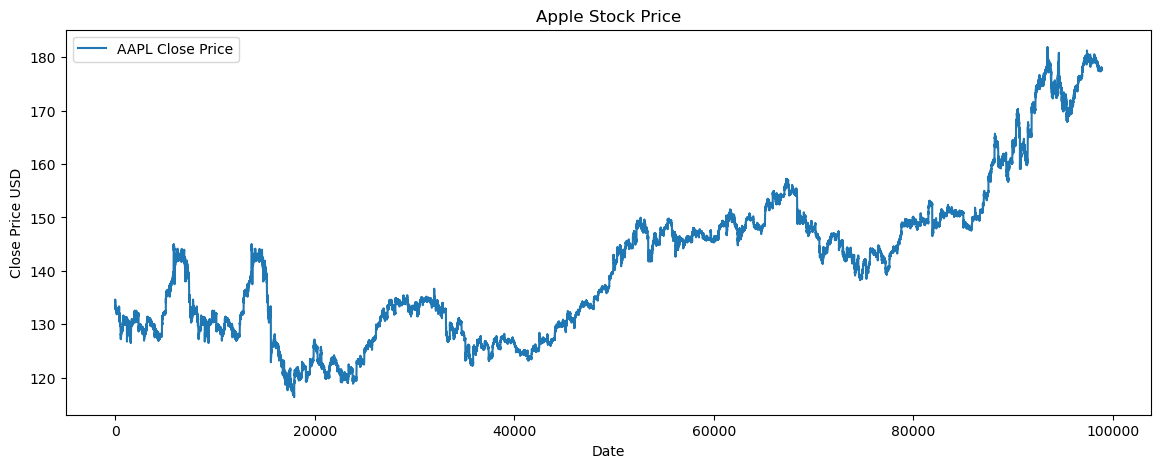

In [ ]:
# AAPL
# Plot the closing prices
plt.figure(figsize=(14, 5))
plt.plot(AAPL['Close'], label='AAPL Close Price')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

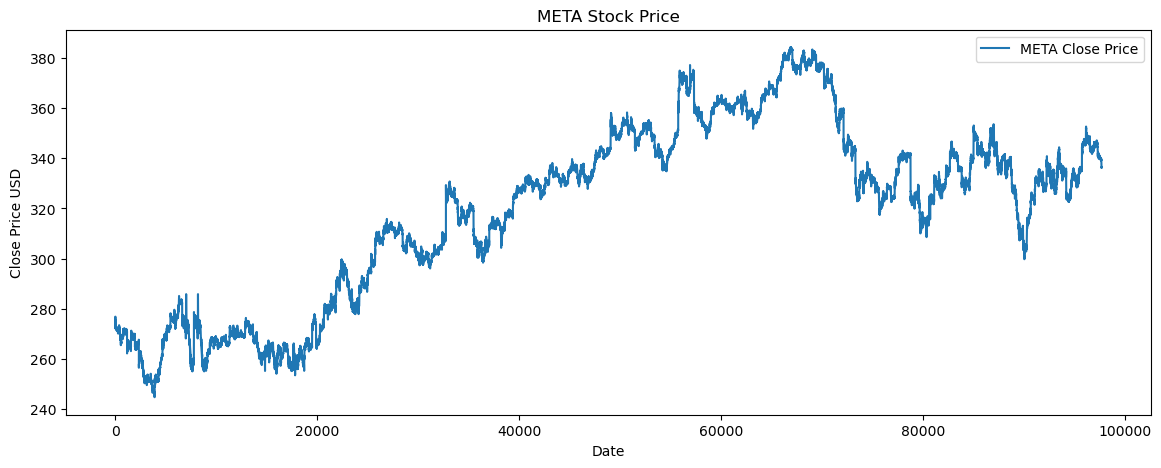

In [ ]:
# META
# Plot the closing prices
plt.figure(figsize=(14, 5))
plt.plot(META['Close'], label='META Close Price')
plt.title('META Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

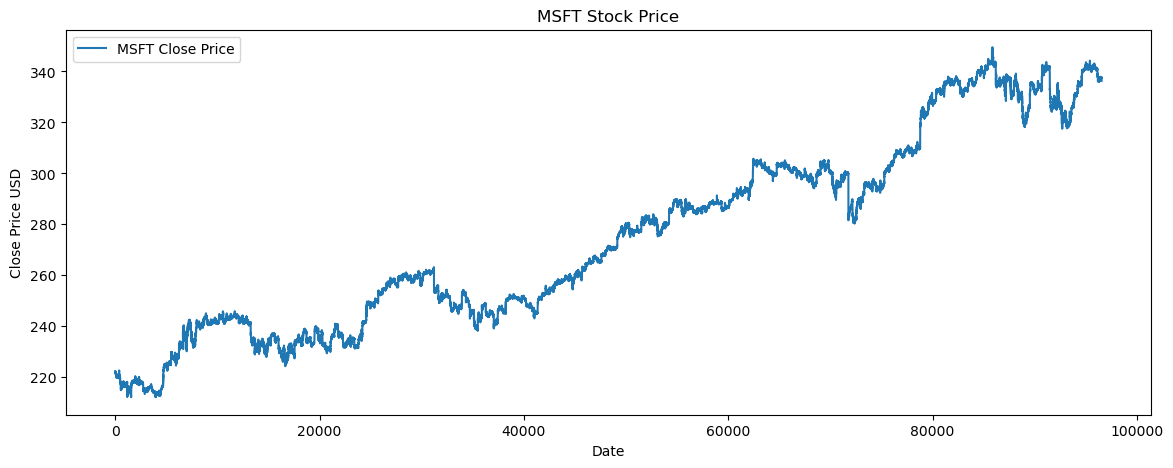

In [ ]:
# MSFT
# Plot the closing prices
plt.figure(figsize=(14, 5))
plt.plot(MSFT['Close'], label='MSFT Close Price')
plt.title('MSFT Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

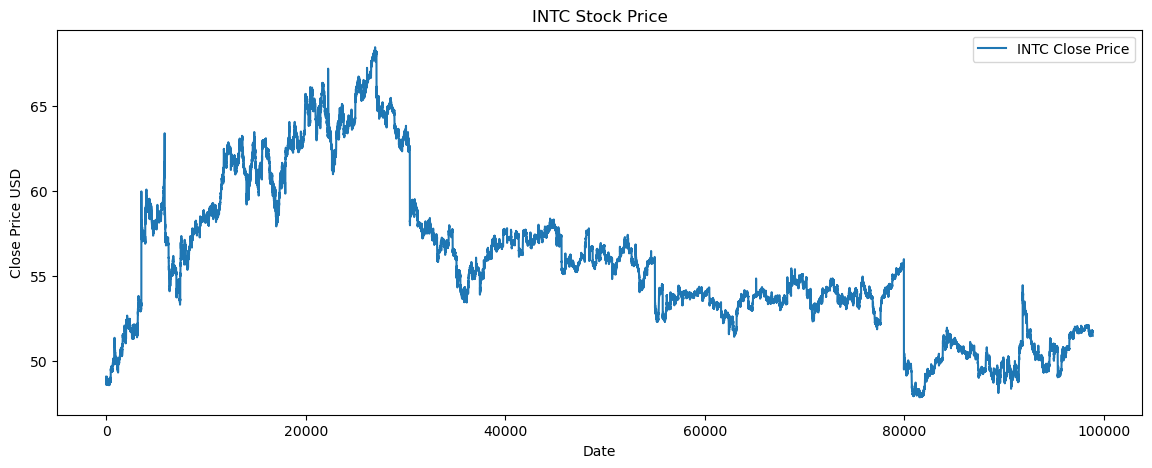

In [ ]:
# INTC
# Plot the closing prices
plt.figure(figsize=(14, 5))
plt.plot(INTC['Close'], label='INTC Close Price')
plt.title('INTC Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

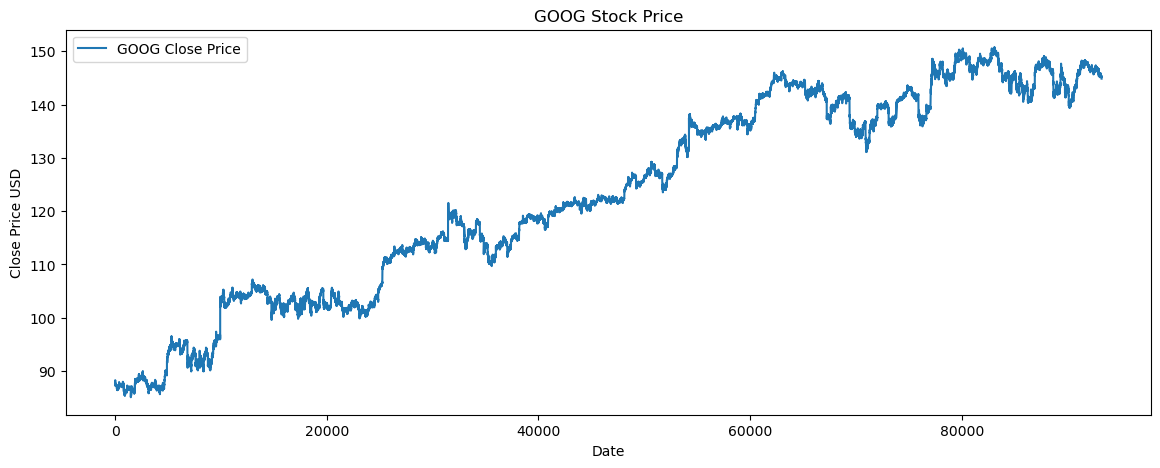

In [ ]:
# GOOG
# Plot the closing prices
plt.figure(figsize=(14, 5))
plt.plot(GOOG['Close'], label='GOOG Close Price')
plt.title('GOOG Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

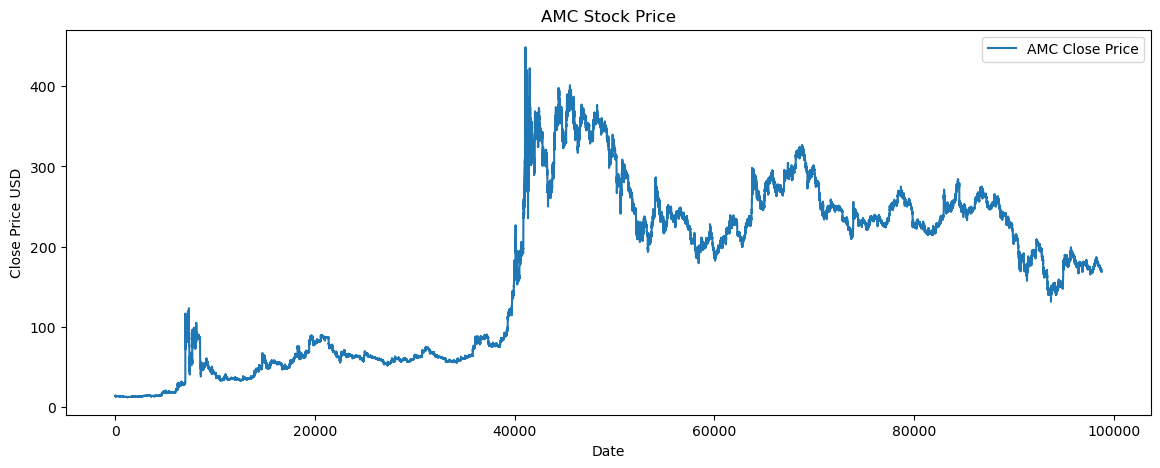

In [ ]:
# AMC
# Plot the closing prices
plt.figure(figsize=(14, 5))
plt.plot(AMC['Close'], label='AMC Close Price')
plt.title('AMC Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

# Feature Scaling for my LSTM models

In [ ]:
# Step 1: Select the closing prices
close_prices = data['Close'].values
close_prices = close_prices.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# Creating Training and Test Sets

In [ ]:
# Define the training data size
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Split the data
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 40:]

# Create the training dataset
x_train, y_train = [], []

for i in range(40, len(train_data)):
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Building the LSTM Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Safet\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Training the Model

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

79065/79065 ━━━━━━━━━━━━━━━━━━━━ 724s 9ms/step - loss: 1.2417e-04


# At this point I think my model should be trained

In [ ]:
# Create the test data
x_test = []
y_test = close_prices[training_data_len:]

for i in range(40, len(test_data)):
    x_test.append(test_data[i-40:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


C:\Users\Safet\AppData\Local\Temp\ipykernel_32024\1852239540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


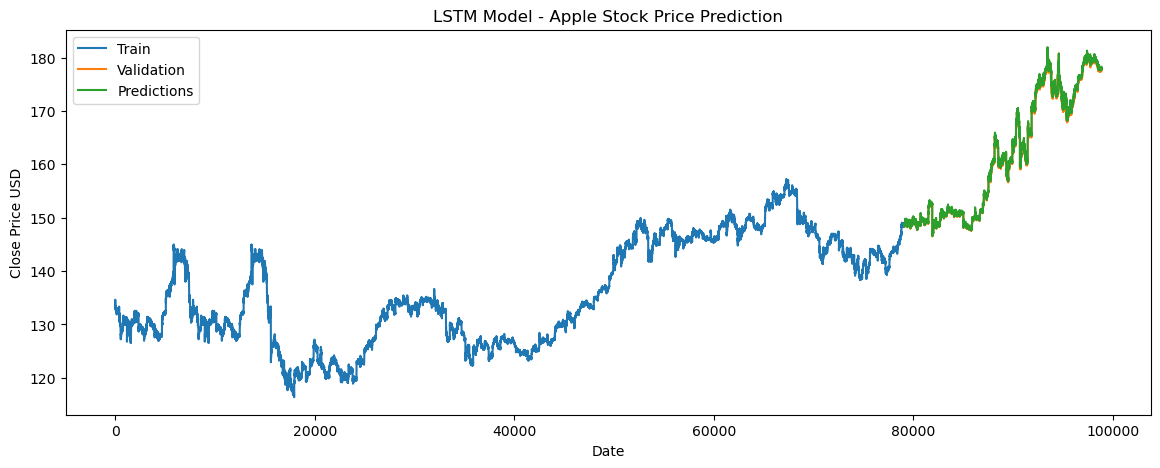

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Validation', 'Predictions'])
plt.title('LSTM Model - Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

In [ ]:
# Step One_Select the closing prices
close_prices = AAPL['Close'].values
close_prices = close_prices.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# Define the training data size
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Split the data
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 40:]

# Create the training dataset
x_train, y_train = [], []

for i in range(40, len(train_data)):
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Safet\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

79065/79065 ━━━━━━━━━━━━━━━━━━━━ 717s 9ms/step - loss: 8.6673e-05


In [ ]:
# Create the test data
x_test = []
y_test = close_prices[training_data_len:]

for i in range(40, len(test_data)):
    x_test.append(test_data[i-40:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


C:\Users\Safet\AppData\Local\Temp\ipykernel_32024\3612439639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


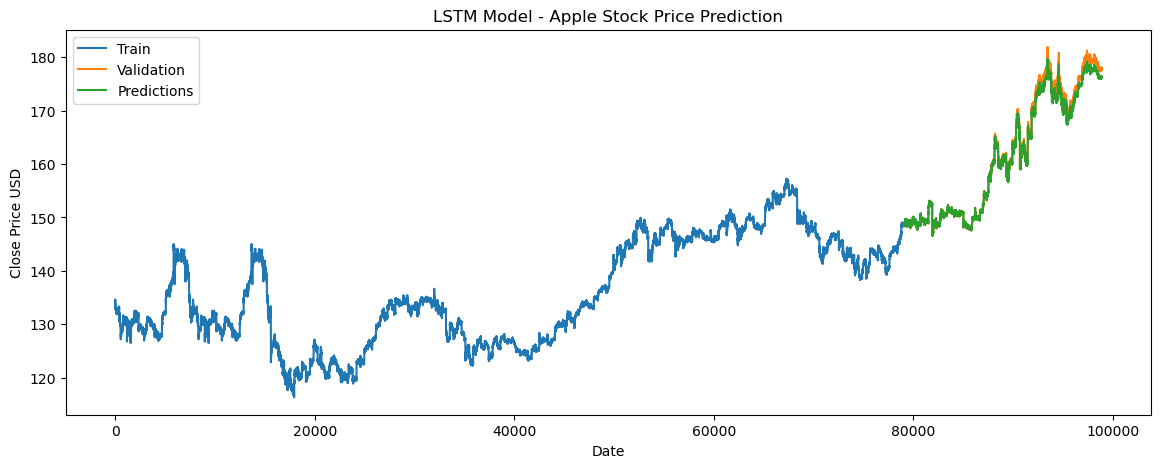

In [ ]:
# Plot the data
train = AAPL[:training_data_len]
valid = AAPL[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Validation', 'Predictions'])
plt.title('LSTM Model - Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

In [ ]:
# Predicting Microsoft Price Jump

In [ ]:
# Select the closing prices
close_prices = MSFT['Close'].values
close_prices = close_prices.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# Define the training data size
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Split the data
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 40:]

# Create the training dataset
x_train, y_train = [], []

for i in range(40, len(train_data)):
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Safet\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

77193/77193 ━━━━━━━━━━━━━━━━━━━━ 625s 8ms/step - loss: 2.2859e-04


In [ ]:
# Create the test data
x_test = []
y_test = close_prices[training_data_len:]

for i in range(40, len(test_data)):
    x_test.append(test_data[i-40:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


C:\Users\Safet\AppData\Local\Temp\ipykernel_32024\3533365050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


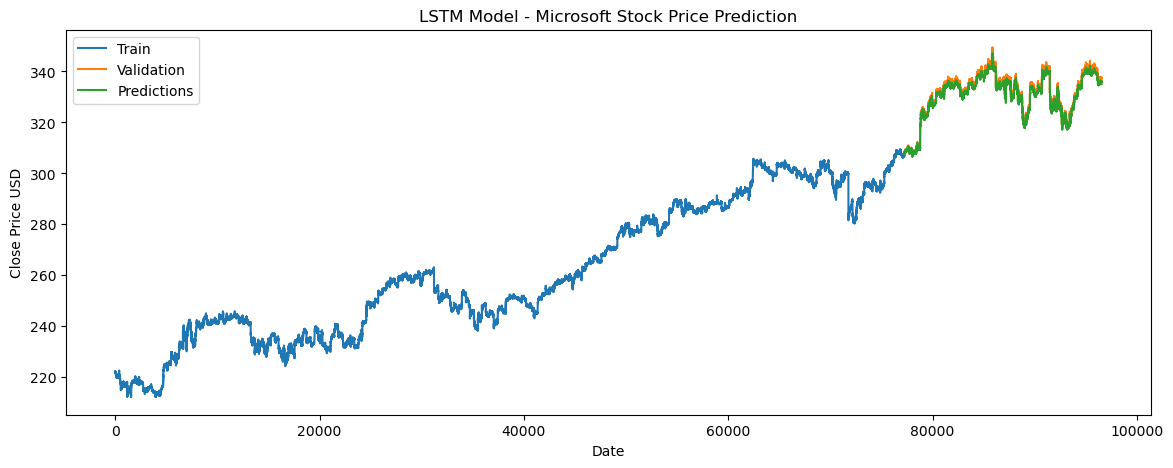

In [ ]:
# Plot the data
train = MSFT[:training_data_len]
valid = MSFT[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Validation', 'Predictions'])
plt.title('LSTM Model - Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

In [ ]:
# META

In [ ]:
# Select the closing prices
close_prices = META['Close'].values
close_prices = close_prices.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# Define the training data size
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Split the data
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 40:]

# Create the training dataset
x_train, y_train = [], []

for i in range(40, len(train_data)):
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Safet\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

78128/78128 ━━━━━━━━━━━━━━━━━━━━ 738s 9ms/step - loss: 1.7816e-04


In [ ]:
# Create the test data
x_test = []
y_test = close_prices[training_data_len:]

for i in range(40, len(test_data)):
    x_test.append(test_data[i-40:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

611/611 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


C:\Users\Safet\AppData\Local\Temp\ipykernel_32024\22000287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


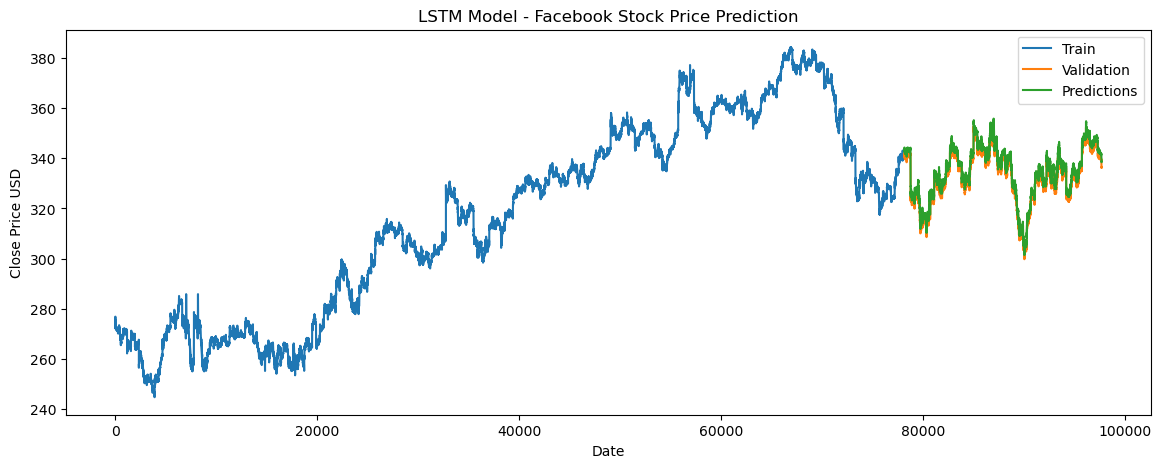

In [ ]:
# Plot the data
train = META[:training_data_len]
valid = META[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Validation', 'Predictions'])
plt.title('LSTM Model - Facebook Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

In [ ]:
# INTC

In [ ]:
# Select the closing prices
close_prices = INTC['Close'].values
close_prices = close_prices.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# Define the training data size
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Split the data
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 40:]

# Create the training dataset
x_train, y_train = [], []

for i in range(40, len(train_data)):
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Safet\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

79064/79064 ━━━━━━━━━━━━━━━━━━━━ 618s 8ms/step - loss: 2.9509e-04


In [ ]:
# Create the test data
x_test = []
y_test = close_prices[training_data_len:]

for i in range(40, len(test_data)):
    x_test.append(test_data[i-40:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


C:\Users\Safet\AppData\Local\Temp\ipykernel_32024\616923486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


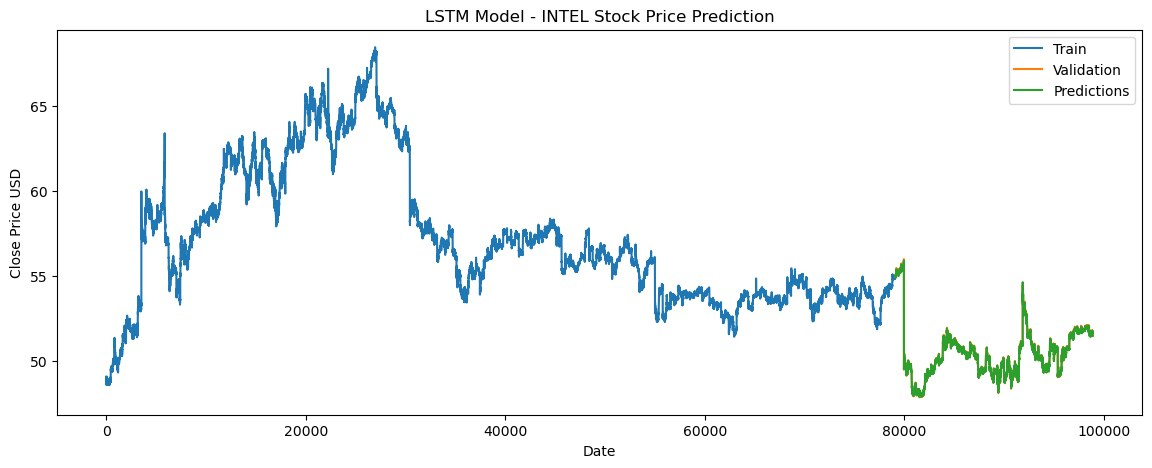

In [ ]:
# Plot the data
train = INTC[:training_data_len]
valid = INTC[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Validation', 'Predictions'])
plt.title('LSTM Model - INTEL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

In [ ]:
# GOOG

In [ ]:
# Select the closing prices
close_prices = GOOG['Close'].values
close_prices = close_prices.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# Define the training data size
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Split the data
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 40:]

# Create the training dataset
x_train, y_train = [], []

for i in range(40, len(train_data)):
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Safet\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

74537/74537 ━━━━━━━━━━━━━━━━━━━━ 770s 10ms/step - loss: 2.0948e-04


In [ ]:
# Create the test data
x_test = []
y_test = close_prices[training_data_len:]

for i in range(40, len(test_data)):
    x_test.append(test_data[i-40:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


C:\Users\Safet\AppData\Local\Temp\ipykernel_32024\2095027315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


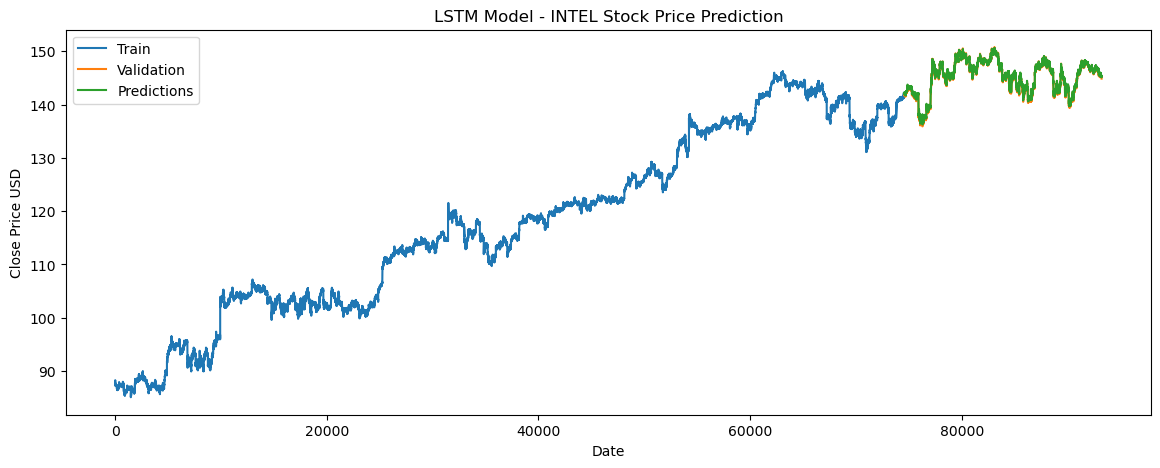

In [ ]:
# Plot the data
train = GOOG[:training_data_len]
valid = GOOG[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Validation', 'Predictions'])
plt.title('LSTM Model - INTEL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

In [ ]:
# AMC

In [ ]:
# Select the closing prices
close_prices = AMC['Close'].values
close_prices = close_prices.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# Define the training data size
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Split the data
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 40:]

# Create the training dataset
x_train, y_train = [], []

for i in range(40, len(train_data)):
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Safet\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

78972/78972 ━━━━━━━━━━━━━━━━━━━━ 872s 11ms/step - loss: 1.5967e-04


In [ ]:
# Create the test data
x_test = []
y_test = close_prices[training_data_len:]

for i in range(40, len(test_data)):
    x_test.append(test_data[i-40:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


C:\Users\Safet\AppData\Local\Temp\ipykernel_32024\2764230425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


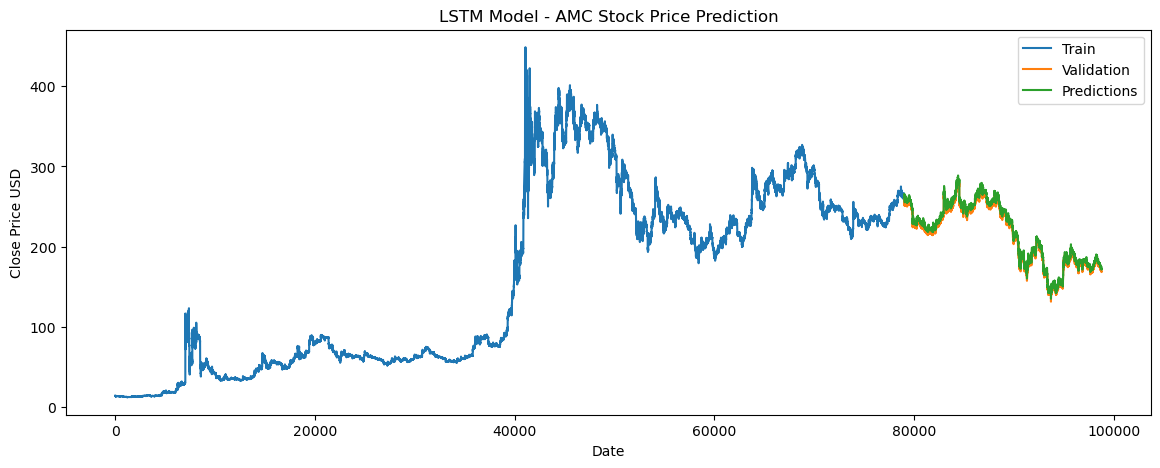

In [ ]:
# Plot the data
train = AMC[:training_data_len]
valid = AMC[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Validation', 'Predictions'])
plt.title('LSTM Model - AMC Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()